**Problem Defination**

it is a Kaggle dataset that was initially taken from the Wish E-Commerce Platform , the main problem is make prediction on rating feature

**The Input Data**

the input data consist of set of features such as : 

**[**currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count**]**




**The Output Data** 

the output is the rating features







**The Required Data Function :**

classification 


**The Challenges :**



1.  The data not clean
2.  We need to make preprocessing on data
3.  the data imblanced
4.  we need to get the correlation between features and drop the features that not important
5. we need to delete unnecessary features





**The Impact :**

the actul rating  help the companies to understand their clients and what the clients need , and the rating help the company to know the advantages and disadvantages of their product

**Ideal Solution**

use set of model to make prediction on rating features based on set of features

**Experimental Protocol**

1. Discover the data
2. make preprocessing on data  such as :
   *   drop the features that contain many null values
   *   drop unnecessary feature 
   *   replace the features that contain few  null values with value
   

3.  make one hot encoding on categorical features
4. After preprocessing  , building the model





      








**The Questions**

**1- Why Data Mining is a misnomer? What is another preferred name?**

- data mining involve set of steps such as data transformation , data cleaning ,
data analysis for extracting important insights from data

- the another preferred is knowledge discovery from databases




**2- What is the general knowledge discovery process?**
 
 it is the process of extracting the imortant information, patterns and important knowledge from huge data.



**3- What is the difference between a data engineer and data scientist/AI engineer?**

 The primary distinction between a data engineer and a data scientist is that the former is in charge of handling and storing data into databases and large-scale processing systems; the latter develops, constructs, tests, and maintains architectures and transports task-relevant data from its source to the required destination, whereas the former is in charge of organising and cleaning up data.



**4- In data mining, what is the difference between prediction and categorization?**

- predication mean predict continous values such as predict the price

- categorization mean predict discrete values such as classify the rating of clients in specific range



**5- Why data science/machine learning is a bad idea in the context of information security?**


Data breaches may become more likely since data science is amethodology that depends on the data. You run the risk of creating a flawed model or feeding your model inaccurate data



**6- What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?**

A popular approach for assessing the security and privacy features The three main objectives of information security are represented by the letters CIA, which stand for Confidentiality, Integrity, and Availability.

**- Confidentiality** :  the process of protection the the important data or sensitive informations from unauthorized users using security methods such as data masking and encryption method 


**- Integrity :** refer to data consistency , we can ensure from integrity by using set of methods such as data validation and error checking

**- Availability** : refer to the availability of data in any time and can access it , can make backup from data to ensure the availability


## import the required libraries

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import classification_report

## Read Data

In [2]:
# reading the train and test data
train=pd.read_csv('/content/assignment_1/train_new.csv')
test=pd.read_csv('/content/assignment_1/test_new.csv')

## Data Discovery 

In [3]:
# show the train data 
train

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [4]:
# show the test data
test

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,...,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166
475,6.00,17,EUR,5000,1,817,0,0,0,0,...,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416
476,4.83,51,EUR,50,1,1,0,0,0,0,...,saulstore,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63
477,3.00,3,EUR,100,1,8,0,0,0,0,...,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626


In [5]:
# get the shape of train data
train.shape

(1094, 34)

In [6]:
# get the shape of test data
test.shape

(479, 33)

In [7]:
# show the number of null values in each column in train data
train.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [8]:
# show the number of null values in each column in test data
test.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

#Data Preprocessing




In [9]:
# getting the unique values from 'rating' column
train["rating"].unique()

array([4., 3., 5., 2., 1., 6.])

In [10]:
# drop the value '6' from rating column because Ratings are in categories from 1 to 5
train=train[train['rating'] !=6]
train = train.reset_index(drop=True)

In [11]:
# sure that no value greater than '5'
train["rating"].unique()

array([4., 3., 5., 2., 1.])

In [12]:
# check that no the value '6' in rating column in another way
train["rating"].describe()

count    1093.000000
mean        4.004575
std         0.582857
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

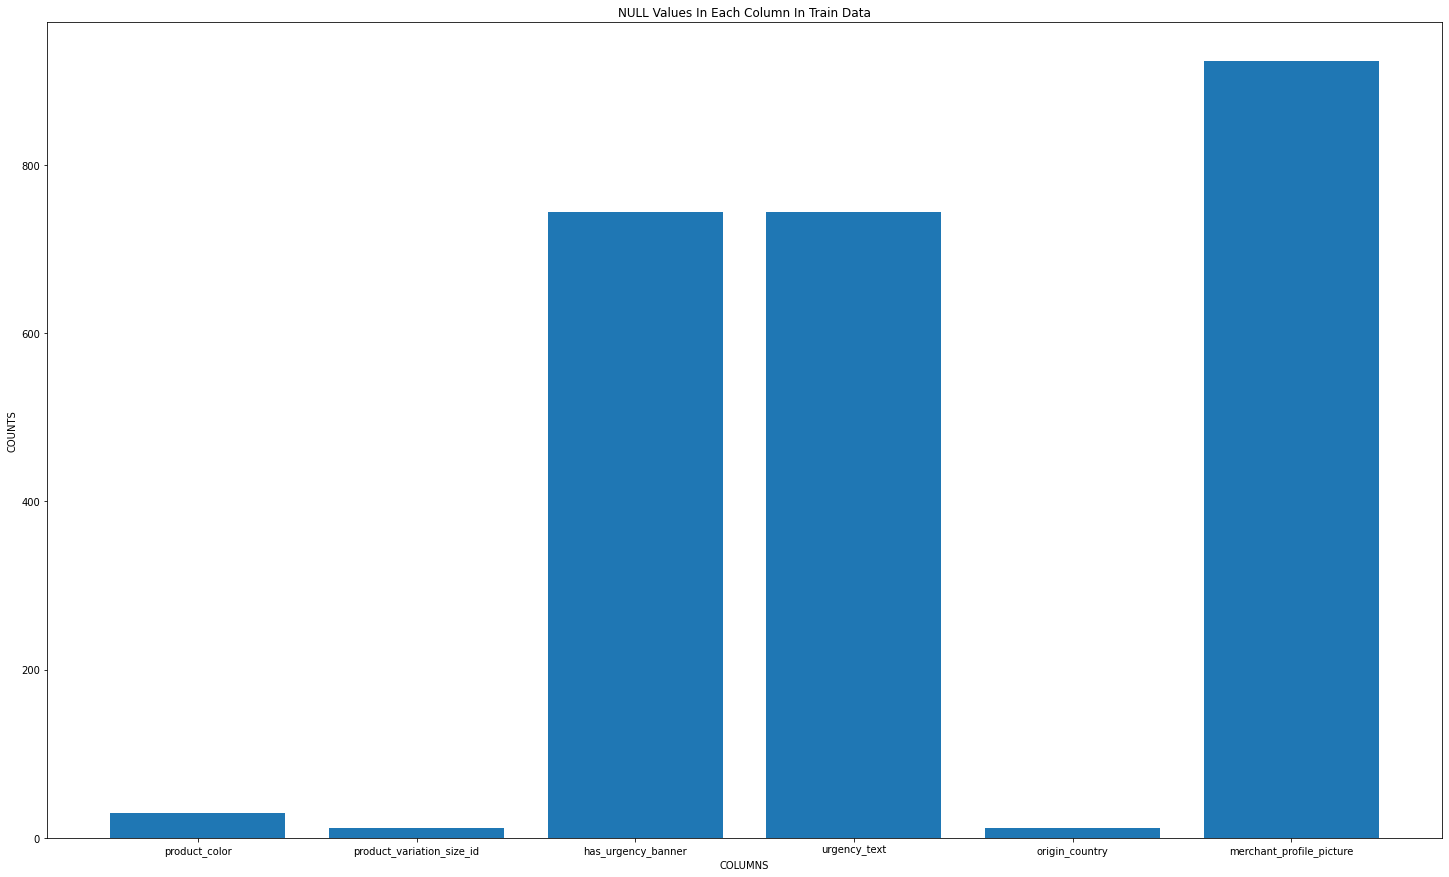

In [13]:
# represent the number of null values in each column in train data
plt.figure(figsize=(25,15))
plt.bar(["product_color","product_variation_size_id","has_urgency_banner","urgency_text","origin_country","merchant_profile_picture"],
        [train["product_color"].isnull().sum(),
         train["product_variation_size_id"].isnull().sum(),
         train["has_urgency_banner"].isnull().sum(),
         train["urgency_text"].isnull().sum(),
         train["origin_country"].isnull().sum(),
         train["merchant_profile_picture"].isnull().sum(),
         ],
        )

plt.title("NULL Values In Each Column In Train Data")
plt.xlabel("COLUMNS")
plt.ylabel("COUNTS")
plt.show()

In [14]:
""" based on the visulaization between features and the count of null values in each feature in  train data ,
 we will drop set of features beacuse these feature have large number of null values 
 such as ['has_urgency_banner','urgency_text','merchant_profile_picture']
"""
# drop features in training data that contain many null values 
train = train.drop(['has_urgency_banner','urgency_text','merchant_profile_picture'],axis=1)

In [15]:
""" based on the visulaization between features and the count of null in each feature values in train data ,
 we will replace the null values from each feature that contain a few number of null values with the most value repeated in the column using mode function 
 the feature are ['product_color'],['product_variation_size_id'],['origin_country']
"""
# convert the null values in train data with the the most frequent value 
train['product_color'].fillna(train['product_color'].mode()[0], inplace=True)
train['product_variation_size_id'].fillna(train['product_variation_size_id'].mode()[0], inplace=True)
train['origin_country'].fillna(train['origin_country'].mode()[0], inplace=True)

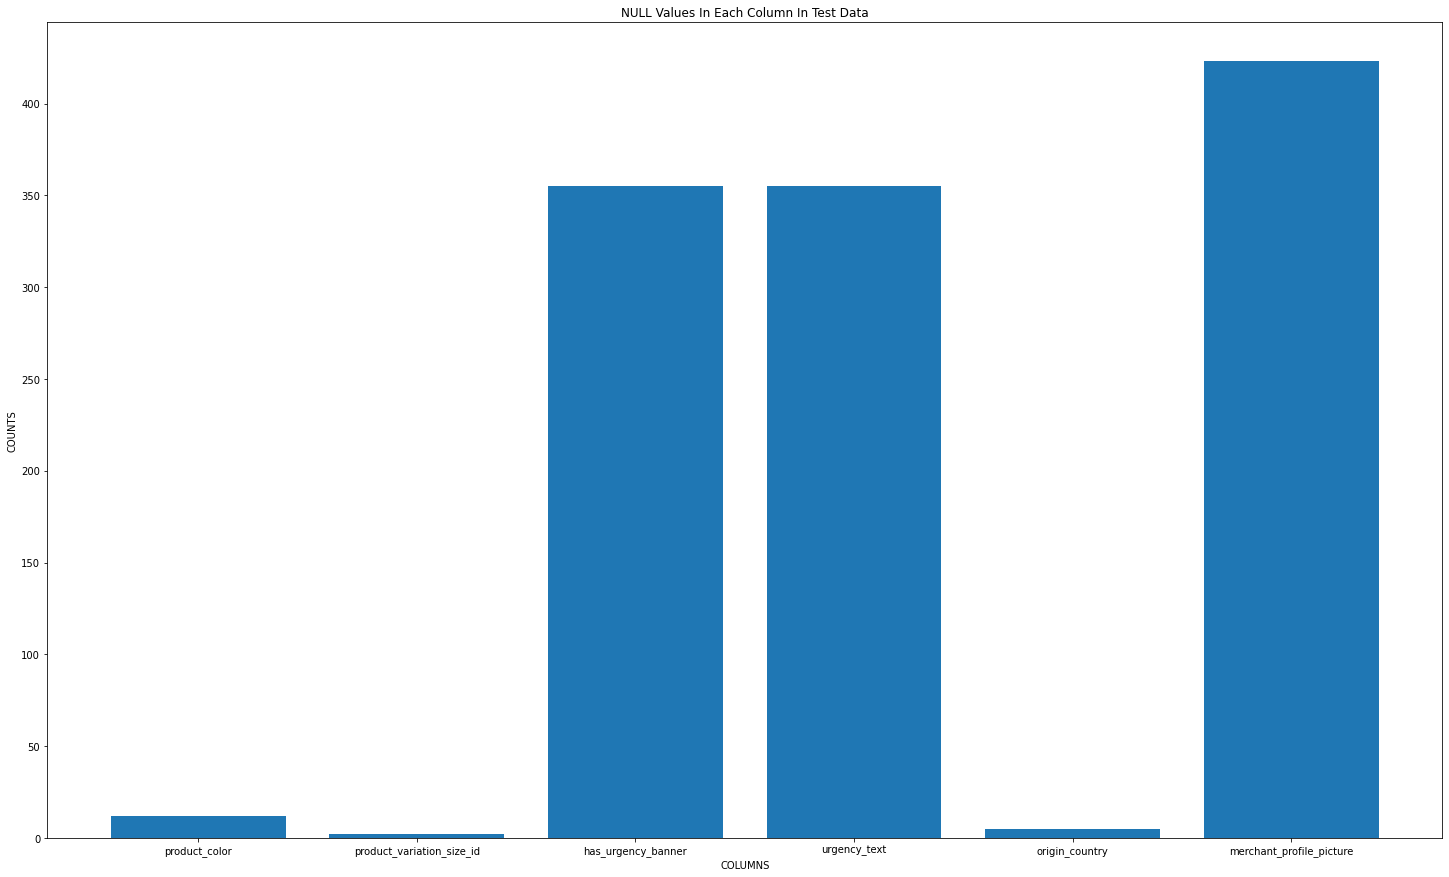

In [16]:
# represent the number of null values in each column in train data
plt.figure(figsize=(25,15))
plt.bar(["product_color","product_variation_size_id","has_urgency_banner","urgency_text","origin_country","merchant_profile_picture"],
        [test["product_color"].isnull().sum(),
         test["product_variation_size_id"].isnull().sum(),
         test["has_urgency_banner"].isnull().sum(),
         test["urgency_text"].isnull().sum(),
         test["origin_country"].isnull().sum(),
         test["merchant_profile_picture"].isnull().sum(),
         ],
        )

plt.title("NULL Values In Each Column In Test Data")
plt.xlabel("COLUMNS")
plt.ylabel("COUNTS")
plt.show()

In [17]:
""" based on the visulaization between features and the count of null values in each feature in test data ,
 we will drop set of features beacuse these feature have large number of null values 
 such as ['has_urgency_banner','urgency_text','merchant_profile_picture']
"""
# drop columns in testung data that contain many null values such as(has_urgency_banner,urgency_text)
test = test.drop(['has_urgency_banner','urgency_text','merchant_profile_picture'],axis=1)

In [18]:
""" based on the visulaization between columns and the count of null values in test data ,
 we will replace the null values of each feature that contain a few number of null values with the most value repeated in the column using mode function 
 the feature are ['product_color'],['product_variation_size_id'],['origin_country']
"""
# convert the null values in test data with the the most frequent value 
test['product_color'].fillna(test['product_color'].mode()[0], inplace=True)
test['product_variation_size_id'].fillna(test['product_variation_size_id'].mode()[0], inplace=True)
test['origin_country'].fillna(test['origin_country'].mode()[0], inplace=True)

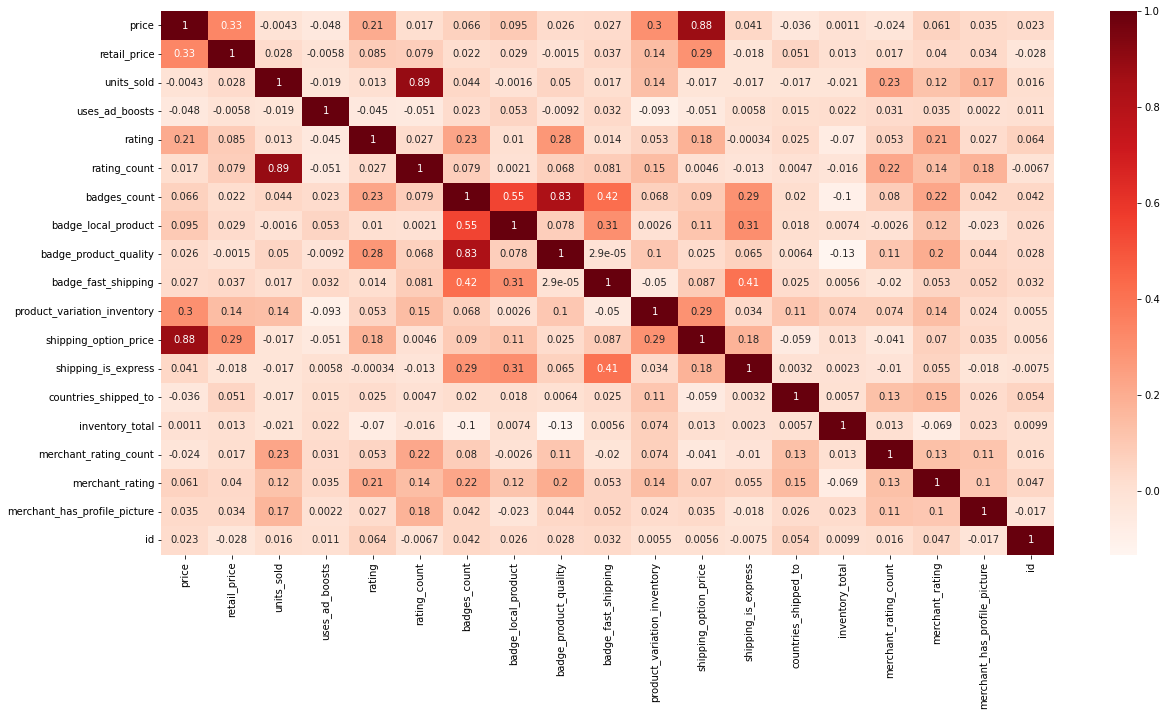

In [19]:
"""Using heatmap to get the relation between features and between (feature and label) 
knowing the correlation help us to know the important features and drop unnecessary feature
"""
plt.figure(figsize=(20,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
# drop set of features in train data that not important in prediction 
train = train.drop(['theme','id','merchant_title','merchant_info_subtitle','currency_buyer','merchant_name','merchant_id','crawl_month','tags','rating_count'],axis=1)

In [21]:
train

,price,retail_price,units_sold,uses_ad_boosts,rating,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,...,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,0,0,0,0,yellow,...,50,Livraison standard,3,0,30,50,CN,66644,4.137582,1
1,8.00,7,1000,0,4.0,1,1,0,0,black,...,50,Livraison standard,3,0,37,50,CN,25752,4.256873,0
2,6.00,34,100,0,4.0,0,0,0,0,white,...,50,Livraison standard,2,0,41,50,CN,3897,3.928920,0
3,4.67,4,100,1,3.0,0,0,0,0,lakeblue,...,5,Livraison standard,1,0,25,50,CN,7497,4.079365,0
4,8.00,11,1000,0,4.0,0,0,0,0,apricot,...,50,Livraison standard,3,0,15,50,CN,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,4.00,4,10000,0,4.0,0,0,0,0,red,...,50,Livraison standard,1,0,41,50,CN,230951,4.311066,0
1089,5.00,5,1000,0,5.0,1,0,1,0,black,...,31,Livraison standard,2,0,35,50,CN,2904,4.422521,0
1090,9.00,48,1000,1,4.0,0,0,0,0,purple,...,50,Livraison standard,3,0,25,50,CN,6632,3.748794,0
1091,11.00,10,10000,1,4.0,0,0,0,0,black,...,50,Livraison standard,2,0,45,50,CN,5816,3.936382,0


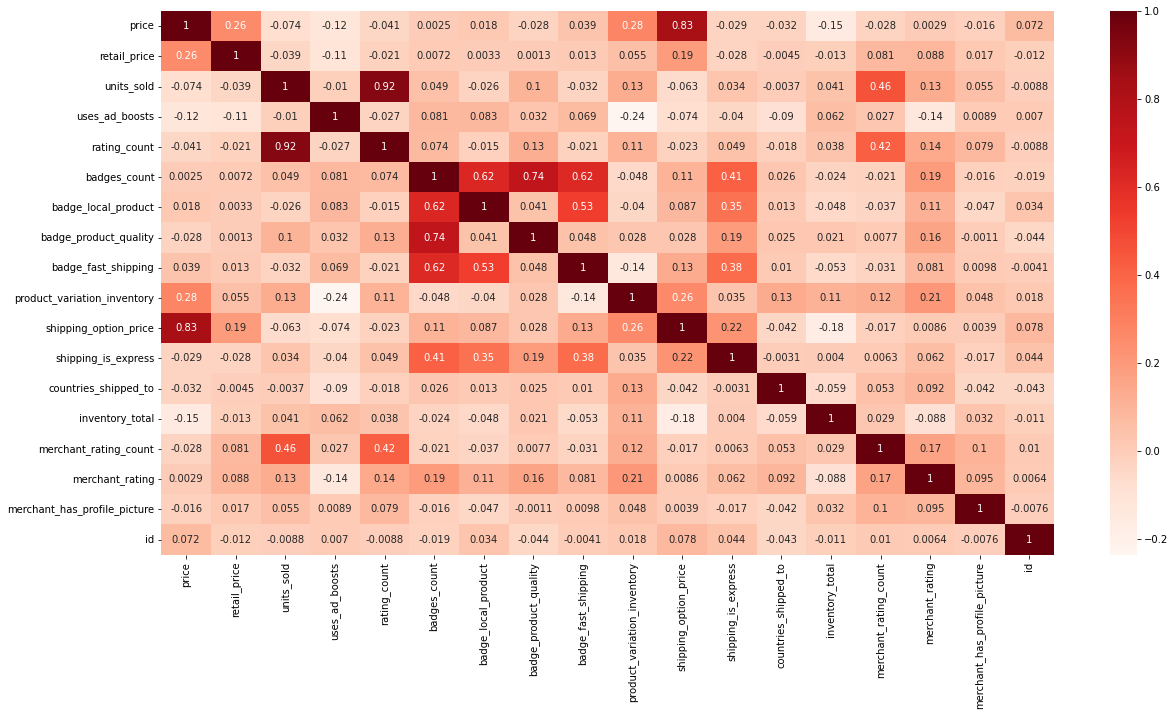

In [22]:
"""Using heatmap to get the relation between features and between (feature and label) 
knowing the correlation help us to know the important features and drop unnecessary feature
"""
import seaborn as sns
plt.figure(figsize=(20,10))
cor = test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
# drop set of feature in test data that not important in prediction 
test_id=test["id"]
test = test.drop(['theme','id','merchant_title','merchant_info_subtitle','currency_buyer','merchant_name','merchant_id','crawl_month','tags','rating_count'],axis=1)

In [24]:
test

,price,retail_price,units_sold,uses_ad_boosts,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,5.75,5,10,1,0,0,0,0,white,XS,5,Livraison standard,2,0,139,50,CN,3,2.333333,0
1,7.00,7,5000,0,0,0,0,0,black,XS,50,Livraison standard,2,0,31,50,CN,4213,4.058391,0
2,5.00,16,1000,1,0,0,0,0,blue,XS,20,Livraison standard,2,0,41,50,CN,10501,4.029235,0
3,18.00,27,5000,1,0,0,0,0,blue,M,50,Livraison standard,5,0,42,50,CN,15855,4.052917,0
4,12.00,81,20000,0,0,0,0,0,white,M,50,Livraison standard,3,0,38,50,CN,151914,4.127921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,0,0,0,0,black,M,50,Livraison standard,4,0,35,50,VE,572,3.367133,0
475,6.00,17,5000,1,0,0,0,0,blue,XXS,1,Livraison standard,2,0,41,50,CN,50864,4.079644,1
476,4.83,51,50,1,0,0,0,0,white,XS,3,Livraison standard,1,0,39,50,VE,57,3.824561,0
477,3.00,3,100,1,0,0,0,0,black,34,3,Livraison standard,1,0,26,50,CN,1086,4.056169,0


In [25]:
# check null values in train data,again
# we will discover that no null values in train data
train.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [26]:
# check null values in test data,again
# we will discover that no null values in test data
test.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [27]:
# we will concat the train and test data together and make encoding on all_data
# convert the features that contain categorical values with numerical values using "get_dummes" function
data=[train,test]
all_data=pd.concat(data,ignore_index=True)
target_features = ['product_variation_size_id','shipping_option_name','product_color','origin_country']
all_data = pd.get_dummies(all_data, columns = target_features)

In [28]:
all_data

,price,retail_price,units_sold,uses_ad_boosts,rating,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,product_color_wine red,product_color_winered,product_color_winered & yellow,product_color_yellow,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
0,8.00,7,10000,1,4.0,0,0,0,0,50,...,0,0,0,1,0,1,0,0,0,0
1,8.00,7,1000,0,4.0,1,1,0,0,50,...,0,0,0,0,0,1,0,0,0,0
2,6.00,34,100,0,4.0,0,0,0,0,50,...,0,0,0,0,0,1,0,0,0,0
3,4.67,4,100,1,3.0,0,0,0,0,5,...,0,0,0,0,0,1,0,0,0,0
4,8.00,11,1000,0,4.0,0,0,0,0,50,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,16.00,14,100,1,NaN,0,0,0,0,50,...,0,0,0,0,0,0,0,0,0,1
1568,6.00,17,5000,1,NaN,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1569,4.83,51,50,1,NaN,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
1570,3.00,3,100,1,NaN,0,0,0,0,3,...,0,0,0,0,0,1,0,0,0,0


In [29]:
# start split the data again into train and test
train=pd.DataFrame(all_data.iloc[:train.shape[0],:])
test=pd.DataFrame(all_data.iloc[train.shape[0]:,:])
test.shape
test.drop(['rating'],axis=1,inplace=True)
test.shape

(479, 243)

In [30]:
#split the data into x , y
X , Y = train[train.columns[train.columns != 'rating']], train[train.columns[train.columns == 'rating']]

# Split Data

In [31]:
# start using train_test_split function to split the data
# the size of test data is 10%
# the size of test data is 90%
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size= 0.1, shuffle=True, random_state= 65)

# **Decision Tree With Grid Search**

In [32]:
"""
- building of grid search  to find the optimal hyperparameters of decision tree model
- the hyperparameters that will pass of grid search are (max_depth,min_samples_leaf,criterion)
"""

"""
thoughts and observations
1- I used set of hyperparameters such as max_depth,criterion and min_samples_leaf
2- I predict the model will fit well based on these parameters 
"""


"""
my plan is build decision tree manually and change the values of hyperparameter such as decrease max_depth and decrease 
min_samples_leaf
"""
parameters = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["entropy", "gini"]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, verbose=1,n_jobs=-1, cv=5,scoring="f1_weighted")
grid_search_cv.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1_weighted', verbose=1)

In [33]:
# get the best estimator
nbdree_s=grid_search_cv.best_estimator_ 
nbdree_s

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [34]:
# get the best score 
grid_search_cv.best_score_

0.706332919034727

In [35]:
"""
1- make prediction on x_val data
"""
y_pred=nbdree_s.predict(x_val)
print(y_pred)


[4. 5. 3. 4. 4. 4. 5. 4. 5. 4. 4. 4. 4. 5. 4. 4. 4. 3. 4. 4. 4. 4. 4. 3.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 5. 5. 4. 4. 5. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4.
 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 3. 4. 4. 3. 4. 4. 4.
 5. 4. 5. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [36]:
# print the classification report
report_1 = classification_report(y_val, y_pred)
print(report_1)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.50      0.20      0.29        15
         4.0       0.78      0.84      0.81        80
         5.0       0.24      0.31      0.27        13

    accuracy                           0.67       110
   macro avg       0.30      0.27      0.27       110
weighted avg       0.66      0.67      0.66       110



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



**the resullt :**
best score on validation is 70% , so that the model fit well with these best hyperparameters


In [37]:
# save CSV file that contain two column(id of test data ,y_pred )
y_pred=nbdree_s.predict(test)
prediction = pd.DataFrame(data={'id': test_id, 'rating': y_pred})
prediction.to_csv('/content/assignment_1/result_2.csv', index=False)

# **Decision Tree Without GridSearch**

In [38]:
"""
1-build the decision tree model add passing manual parameters to model
2- train the Decision Tree Model using (x_train, y_train)
3- make prediction on x_val data
"""


"""
thoughts and observations
1- I used set of hyperparameters such as max_depth,criterion and min_samples_leaf and pass these hyperparameters to model
2- I predict the model will fit well based on these parameters than the previous model 
"""


"""
my plan is build  SVM model manually 
"""
decision_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf = 2, min_samples_split = 15, criterion = 'entropy')
decision_model.fit(x_train, y_train)
y_pred_2 = decision_model.predict(x_val)
print(y_pred_2)

[4. 5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4.
 4. 5. 4. 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [39]:
# get the value of f1-score between(y_val,y_pred)
dtree_score2=f1_score(y_val,y_pred_2,average='weighted')
dtree_score2

0.7053498467824311

In [40]:
# print the classification report
report_2 = classification_report(y_val, y_pred_2)
print(report_2)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       1.00      0.07      0.12        15
         4.0       0.79      0.96      0.87        80
         5.0       0.55      0.46      0.50        13

    accuracy                           0.76       110
   macro avg       0.47      0.30      0.30       110
weighted avg       0.77      0.76      0.71       110



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**the resullt :**
 best score on validation still close to  70% , so that the model fit well with these best parameters that passed manually

In [41]:
# save CSV file that contain two column(id of test data ,y_pred_22 )
y_pred_22=decision_model.predict(test)
prediction = pd.DataFrame(data={'id': test_id, 'rating': y_pred_22})
prediction.to_csv('/content/assignment_1/result_3.csv', index=False)

# Support Vector Machine (1)

In [42]:
"""
1-build svm model add passing manual parameters to model
2- train the svm Model using (x_train, y_train)
3- make prediction on x_val data
"""

"""
thoughts and observations
1- I used set of hyperparameters such as C,gamma and pass these hyperparameters to model
2- I predict the model will fit well based on these parameters than the previous model 
"""


"""
my plan is build  another SVM model manually and pass different hyperparameters such as kernel,degree
"""

svc = svm.SVC(C=10, gamma=1).fit(x_train, y_train)
y_pred_3 = svc.predict(x_val)
print(y_pred_3)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4.
 3. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4.
 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [43]:
# get the value of f1-score between(y_val,y_pred_3)
svm_score_2=f1_score(y_val,y_pred_3,average='weighted')
svm_score_2

0.7338891939237063

In [44]:
# print the classification report
report_3 = classification_report(y_val, y_pred_3)
print(report_3)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.00      0.00      0.00         1
         3.0       1.00      0.27      0.42        15
         4.0       0.78      1.00      0.87        80
         5.0       1.00      0.15      0.27        13

    accuracy                           0.79       110
   macro avg       0.76      0.48      0.51       110
weighted avg       0.83      0.79      0.73       110



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**the resullt :** 
the score on validation is 73% , so that the model fit more  well than decision tree with these parameters

In [45]:
# save CSV file that contain two column(id of test data ,y_pred_22 )
y_pred_3=svc.predict(test)
prediction = pd.DataFrame(data={'id': test_id, 'rating': y_pred_3})
prediction.to_csv('/content/assignment_1/result_5.csv', index=False)

# Support Vector Machine (2)

In [46]:
"""
1-build svm model add passing manual parameters to model
2- train svm Model using (x_train, y_train)
3- make prediction on x_val data
"""

"""
thoughts and observations
1- I used set of different hyperparameters such as degree,kernel 
2- I thoughts the model will be good but it depend on the values of degree and kernal
"""


"""
my plan is build  naive bayes model using grid search  
"""

svc_2 = svm.SVC(C=10,kernel='poly',degree=8).fit(x_train, y_train)
y_pred_4 = svc_2.predict(x_val)
print(y_pred_4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [47]:
# get the value of f1-score between(y_val,y_pred_4)
svm_score_3=f1_score(y_val,y_pred_4,average='weighted')
svm_score_3

0.6124401913875599

In [48]:
# print the classification report
report_4 = classification_report(y_val, y_pred_4)
print(report_4)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00        15
         4.0       0.73      1.00      0.84        80
         5.0       0.00      0.00      0.00        13

    accuracy                           0.73       110
   macro avg       0.15      0.20      0.17       110
weighted avg       0.53      0.73      0.61       110



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**the** **resullt**: 
the score on validation is 61% , so that the model not fit well with these parameters ,perhaps the values of degree and kernal Inappropriate 

In [49]:
# save CSV file that contain two column(id of test data ,y_pred_4)
y_pred_4=svc_2.predict(test)
prediction = pd.DataFrame(data={'id': test_id, 'rating': y_pred_4})
prediction.to_csv('/content/assignment_1/result_6.csv', index=False)

# **Naive Bayes with Grid Search**

In [50]:
# building of grid search  to find the optimal hyperparameters of Naive Bayes model
# the hyperparameters that will pass to grid search are (the model,var_smoothing)
"""
thoughts and observations
1- I used a hyperparameter called var_smoothing and pass it to grid search
2- I thoughts the model will not fit well because the model work well with independant features
"""

"""
my plan is build random forest model using grid search  
"""

param_grid_nb = {
    'var_smoothing': np.logspace(0, -10, num=200)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb,cv=10)
nbModel_grid.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.90735464e-01, 7.93409667e-01, 7.06718127e-01,
       6.29498899e-01, 5.60716994e-01, 4.99450512e-01, 4.44878283e-01,
       3.96268864e-01, 3.52970730e-01, 3.14403547e-01, 2.80050389e-01,
       2.49450814e-01, 2.22194686e-01, 1.97916687e-01, 1.76291412e-01,
       1.57029012e-01, 1.39871310e-01, 1.2...
       1.43145894e-09, 1.27505124e-09, 1.13573336e-09, 1.01163798e-09,
       9.01101825e-10, 8.02643352e-10, 7.14942899e-10, 6.36824994e-10,
       5.67242607e-10, 5.05263107e-10, 4.50055768e-10, 4.00880633e-10,
       3.57078596e-10, 3.18062569e-10, 2.83309610e-10, 2.52353917e-10,
       2.24780583e-10, 2.00220037e-10, 1.78343088e-10, 1.58856513e-10,
       1.41499130e-10, 1.26038293e-10, 1.12266777e-10, 1.00000000e-10])})

In [51]:
# get the best f1-score 
print(nbModel_grid.best_score_)

0.6998660070088641


In [52]:
#get the best value of hyperparameters using best_params_
print(nbModel_grid.best_params_)

{'var_smoothing': 0.890735463861044}


In [53]:
#get the estimator with best parameter
naive_s=nbModel_grid.best_estimator_
naive_s

GaussianNB(var_smoothing=0.890735463861044)

In [54]:
#make prediction on x_val data
y_pred_naive= nbModel_grid.predict(x_val)

In [55]:
# print the classification report
report_5 = classification_report(y_val, y_pred_naive)
print(report_5)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00        15
         4.0       0.73      1.00      0.84        80
         5.0       0.00      0.00      0.00        13

    accuracy                           0.73       110
   macro avg       0.15      0.20      0.17       110
weighted avg       0.53      0.73      0.61       110



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**the resullt:** the score on validation is 70% , so that i think  the model to some extent fit well with these hyperparameters 

In [56]:
# save CSV file that contain two column(id of test data ,y_pred_naive)
y_pred_naive=nbModel_grid.predict(test)
prediction = pd.DataFrame(data={'id': test_id, 'rating': y_pred_naive})
prediction.to_csv('/content/assignment_1/result_naive.csv', index=False)

# Random Forest

In [57]:
# building of grid search  to find the optimal hyperparameters of random forest
# the hyperparameters that will pass of grid search are (the model,max_depth,n_estimators,max_features)

"""
thoughts and observations
1- I used a different hyperparameters such as max_depth,n_estimators,max_features and pass best values to random forest model
2- I thoughts the model will fit well
"""
rf = RandomForestClassifier()
grid_space={
    'n_estimators':[350,450,550],
    'max_features':[15,17,20,25,28],
           }

          #  'max_depth':[3,5,10,None],
          #     'n_estimators':[100,200,250],
          #     'max_features':[15,17],

In [58]:
grid = GridSearchCV(rf,param_grid=grid_space,cv=5,scoring='f1_weighted')
model_grid = grid.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [59]:
# get the best estimator
fore_best=model_grid.best_estimator_ 
fore_best 

RandomForestClassifier(max_features=28, n_estimators=550)

In [60]:
#print the best parameters
print(model_grid.best_params_)

{'max_features': 28, 'n_estimators': 550}


In [61]:
# get the best score
model_grid.best_score_

0.7626834440012138

In [62]:
#train the model and make prediction on x_val data
fore_best.fit(x_train, y_train)
y_predd=fore_best.predict(x_val)
print(y_predd)
y_predd

<ipython-input-62-d6325cbce660>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fore_best.fit(x_train, y_train)


[4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4.
 3. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 5. 5. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4.
 3. 1. 4. 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


array([4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 3., 4., 4., 4., 4., 3., 4., 4., 4., 5., 4., 4., 4., 4., 4.,
       4., 5., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 4., 3., 1., 4., 4., 5., 4., 4., 5., 4., 4., 4., 4., 4.,
       4., 4., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 5., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4.])

In [63]:
# print the classification report
report_6 = classification_report(y_val, y_predd)
print(report_6)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.80      0.27      0.40        15
         4.0       0.82      0.96      0.89        80
         5.0       0.80      0.62      0.70        13

    accuracy                           0.82       110
   macro avg       0.68      0.57      0.60       110
weighted avg       0.81      0.82      0.79       110



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**the resullt:** the score on validation is76 % , so that i think the model  fit well with these hyperparameters , the random forest the best model 

In [64]:
# save CSV file that contain two column(id of test data ,y_pred )
y_predd=fore_best.predict(test)
prediction = pd.DataFrame(data={'id': test_id, 'rating': y_predd})
prediction.to_csv('/content/assignment_1/resultcsv.csv', index=False)